<a href="https://colab.research.google.com/github/Jadhav2024/case_study/blob/main/Online_Vehicle_booking_market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.cluster import KMeans


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [20]:
import pandas as pd


file_path = 'YourCabs_training.csv'
data = pd.read_csv(file_path)


missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data.fillna(data.mean(numeric_only=True), inplace=True)


for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


data_cleaned = data.drop_duplicates()


print("Data types of columns:\n", data.dtypes)

if 'Booking_DateTime' in data.columns:
    data['Booking_DateTime'] = pd.to_datetime(data['Booking_DateTime'], errors='coerce')


for col in data.columns:
    if data[col].dtype == 'object':

        data[col] = pd.to_numeric(data[col], errors='ignore')


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    mean = data[col].mean()
    std = data[col].std()
    data_cleaned = data_cleaned[(data_cleaned[col] > mean - 3*std) & (data_cleaned[col] < mean + 3*std)]

columns_to_drop = ['some_irrelevant_column']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Final cleaned data
print("Cleaned data preview:")
print(data_cleaned.head())

# Save cleaned data to a new CSV file
data_cleaned.to_csv('YourCabs_cleaned.csv', index=False)


Missing values in each column:
 id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64
Number of duplicate rows: 0
Data types of columns:
 id                       int64
user_id                  int64
vehicle_model_id         int64
package_id             float64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
from_city_id           float64
to_city_id             float64
from_date               object
to_date      

<ipython-input-20-ec35ecc771a8>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-20-ec35ecc771a8>:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


Cleaned data preview:
       id  user_id  vehicle_model_id  package_id  travel_type_id  \
0  132512    22177                28    2.030066               2   
1  132513    21413                12    2.030066               2   
2  132514    22178                12    2.030066               2   
3  132515    13034                12    2.030066               2   
4  132517    22180                12    2.030066               2   

   from_area_id  to_area_id  from_city_id  to_city_id      from_date  \
0          83.0       448.0     14.915081   68.537783  1/1/2013 2:00   
1        1010.0       540.0     14.915081   68.537783  1/1/2013 9:00   
2        1301.0      1034.0     14.915081   68.537783  1/1/2013 3:30   
3         768.0       398.0     14.915081   68.537783  1/1/2013 5:45   
4        1365.0       849.0     14.915081   68.537783  1/1/2013 9:00   

       to_date  online_booking  mobile_site_booking booking_created  \
0  41507.97484               0                    0   1/1/2013 1:

In [11]:

df = pd.read_csv('YourCabs_cleaned.csv')


print(df.head())


       id  user_id  vehicle_model_id  package_id  travel_type_id  \
0  132512    22177                28    2.030066               2   
1  132513    21413                12    2.030066               2   
2  132514    22178                12    2.030066               2   
3  132515    13034                12    2.030066               2   
4  132517    22180                12    2.030066               2   

   from_area_id  to_area_id  from_city_id  to_city_id      from_date  \
0          83.0       448.0     14.915081   68.537783  1/1/2013 2:00   
1        1010.0       540.0     14.915081   68.537783  1/1/2013 9:00   
2        1301.0      1034.0     14.915081   68.537783  1/1/2013 3:30   
3         768.0       398.0     14.915081   68.537783  1/1/2013 5:45   
4        1365.0       849.0     14.915081   68.537783  1/1/2013 9:00   

       to_date  online_booking  mobile_site_booking booking_created  \
0  41507.97484               0                    0   1/1/2013 1:39   
1  41507.97484  

In [ ]:
df.shape

(43431, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

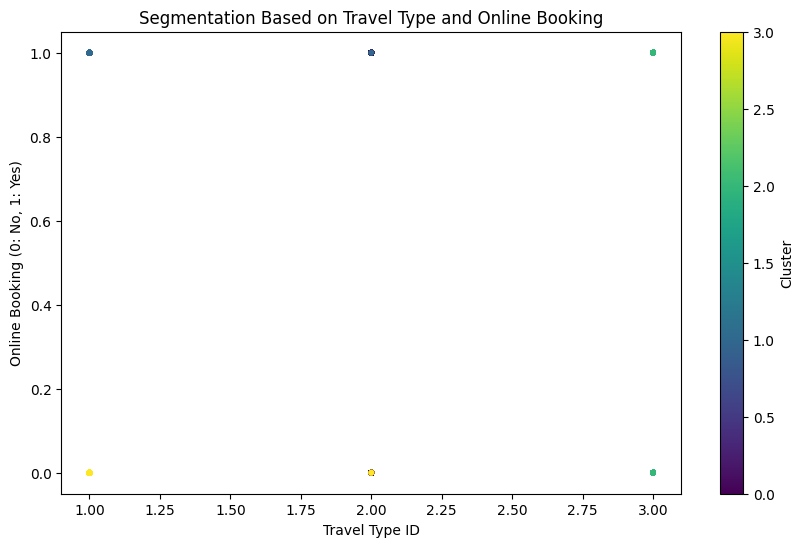

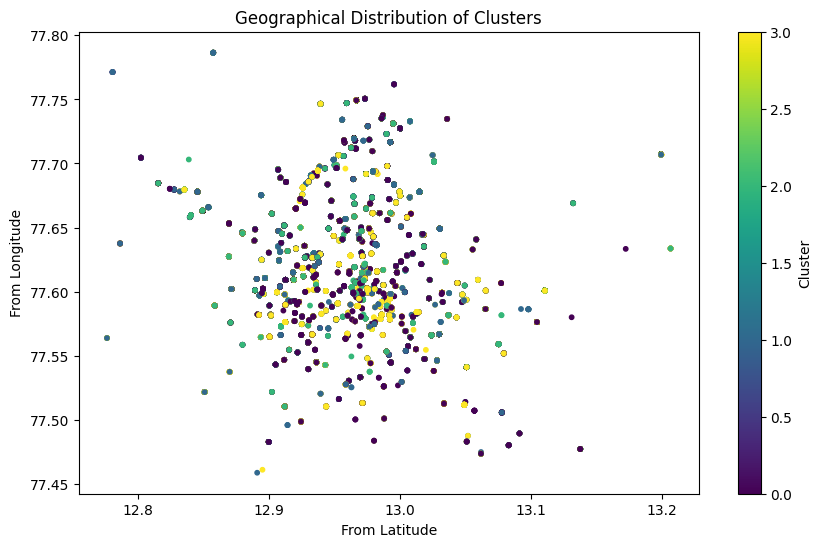

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Selecting relevant columns and dropping rows with missing values
cluster_data_full = data[['travel_type_id', 'online_booking', 'mobile_site_booking',
                          'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation', 'Cost_of_error']].dropna()

# Step 2: Normalizing the data
scaler = StandardScaler()
cluster_data_full_scaled = scaler.fit_transform(cluster_data_full)

# Step 3: K-Means Clustering
kmeans_full = KMeans(n_clusters=4, random_state=42)
clusters_full = kmeans_full.fit_predict(cluster_data_full_scaled)

# Adding the cluster labels to the dataset
cluster_data_full['cluster'] = clusters_full

# Step 4: Visualization
# Visualization 1: Based on travel type and online booking
plt.figure(figsize=(10, 6))

plt.scatter(cluster_data_full['travel_type_id'], cluster_data_full['online_booking'],
            c=cluster_data_full['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Segmentation Based on Travel Type and Online Booking')
plt.xlabel('Travel Type ID')
plt.ylabel('Online Booking (0: No, 1: Yes)')
plt.show()

# Visualization 2: Geographical distribution (latitude and longitude)
plt.figure(figsize=(10, 6))

plt.scatter(cluster_data_full['from_lat'], cluster_data_full['from_long'],
            c=cluster_data_full['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Geographical Distribution of Clusters')
plt.xlabel('From Latitude')
plt.ylabel('From Longitude')
plt.show()


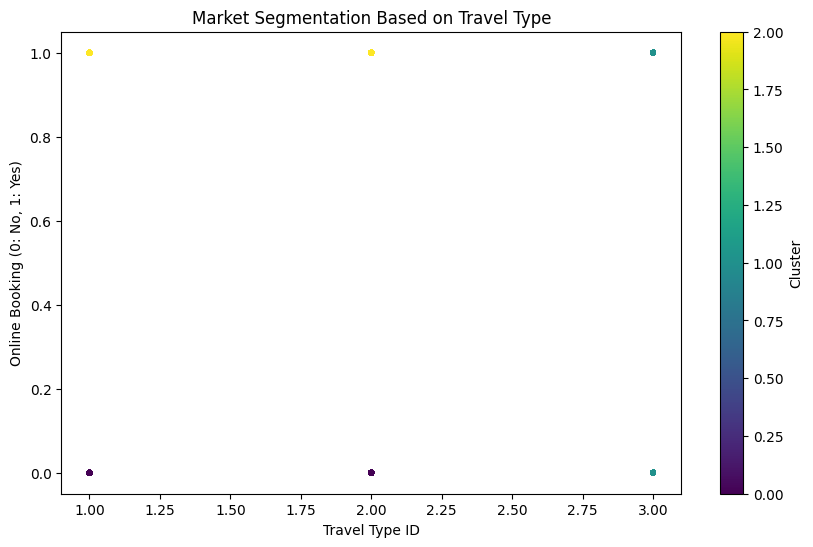

         travel_type_id  online_booking  mobile_site_booking  \
cluster                                                        
0              1.987446        0.000000                  0.0   
1              3.000000        0.281455                  0.0   
2              1.986731        1.000000                  0.0   

         Car_Cancellation  Cost_of_error  
cluster                                   
0                     0.0            1.0  
1                     0.0            1.0  
2                     0.0            1.0  


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Selecting travel_type_id and related attributes for segmentation
cluster_data_travel_type = data[['travel_type_id', 'online_booking', 'mobile_site_booking',
                                 'Car_Cancellation', 'Cost_of_error']].dropna()

# Step 2: Normalizing the data
scaler = StandardScaler()
cluster_data_travel_type_scaled = scaler.fit_transform(cluster_data_travel_type)

# Step 3: K-Means Clustering
kmeans_travel_type = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for segmentation
clusters_travel_type = kmeans_travel_type.fit_predict(cluster_data_travel_type_scaled)

# Adding the cluster labels to the dataset
cluster_data_travel_type['cluster'] = clusters_travel_type

# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Scatter plot based on travel type and online booking
plt.scatter(cluster_data_travel_type['travel_type_id'], cluster_data_travel_type['online_booking'],
            c=cluster_data_travel_type['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Market Segmentation Based on Travel Type')
plt.xlabel('Travel Type ID')
plt.ylabel('Online Booking (0: No, 1: Yes)')
plt.show()

# Optional: View cluster statistics
print(cluster_data_travel_type.groupby('cluster').mean())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


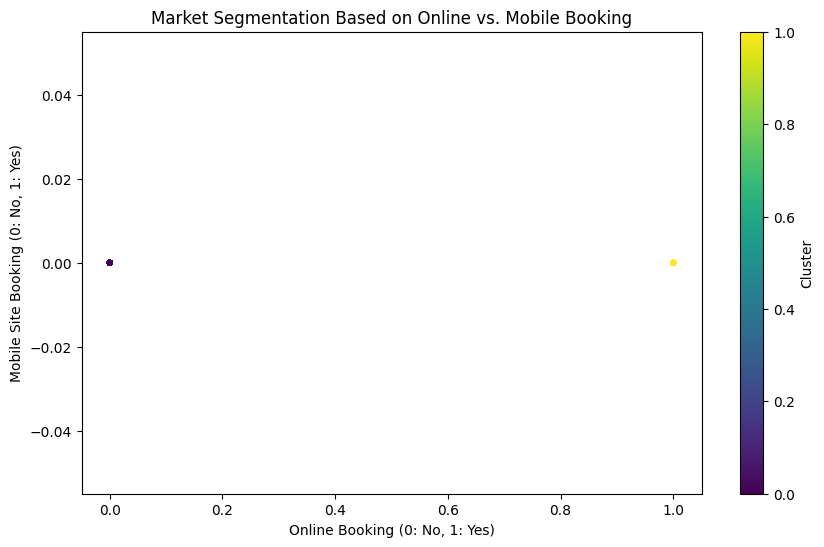

         online_booking  mobile_site_booking  Car_Cancellation  Cost_of_error
cluster                                                                      
0                   0.0                  0.0               0.0            1.0
1                   1.0                  0.0               0.0            1.0


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Selecting online and mobile booking related features for segmentation
cluster_data_booking = data[['online_booking', 'mobile_site_booking', 'Car_Cancellation', 'Cost_of_error']].dropna()

# Step 2: Normalizing the data
scaler = StandardScaler()
cluster_data_booking_scaled = scaler.fit_transform(cluster_data_booking)

# Step 3: K-Means Clustering
kmeans_booking = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for segmentation
clusters_booking = kmeans_booking.fit_predict(cluster_data_booking_scaled)

# Adding the cluster labels to the dataset
cluster_data_booking['cluster'] = clusters_booking

# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Scatter plot based on online booking and mobile site booking
plt.scatter(cluster_data_booking['online_booking'], cluster_data_booking['mobile_site_booking'],
            c=cluster_data_booking['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Market Segmentation Based on Online vs. Mobile Booking')
plt.xlabel('Online Booking (0: No, 1: Yes)')
plt.ylabel('Mobile Site Booking (0: No, 1: Yes)')
plt.show()

# Optional: View cluster statistics
print(cluster_data_booking.groupby('cluster').mean())


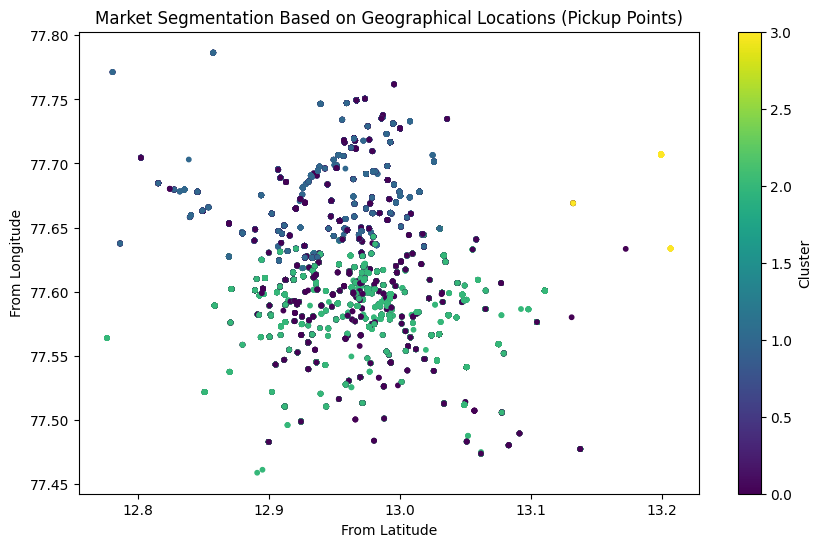

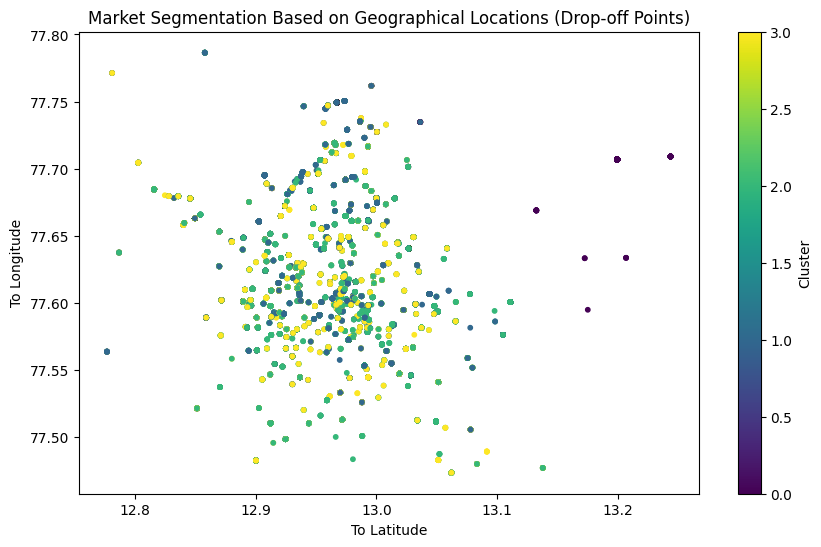

          from_lat  from_long     to_lat    to_long
cluster                                            
0        12.957321  77.629688  13.195075  77.707520
1        12.950112  77.679668  12.983521  77.630422
2        12.975618  77.583259  12.981742  77.613523
3        13.199455  77.706656  12.955191  77.628812


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Selecting geographical features (latitude and longitude) for segmentation
cluster_data_geo = data[['from_lat', 'from_long', 'to_lat', 'to_long']].dropna()

# Step 2: Normalizing the data
scaler = StandardScaler()
cluster_data_geo_scaled = scaler.fit_transform(cluster_data_geo)

# Step 3: K-Means Clustering
kmeans_geo = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters for geographical segmentation
clusters_geo = kmeans_geo.fit_predict(cluster_data_geo_scaled)

# Adding the cluster labels to the dataset
cluster_data_geo['cluster'] = clusters_geo

# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Scatter plot based on 'from_lat' and 'from_long' to visualize geographical clusters
plt.scatter(cluster_data_geo['from_lat'], cluster_data_geo['from_long'],
            c=cluster_data_geo['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Market Segmentation Based on Geographical Locations (Pickup Points)')
plt.xlabel('From Latitude')
plt.ylabel('From Longitude')
plt.show()

# Visualization for drop-off locations
plt.figure(figsize=(10, 6))

# Scatter plot based on 'to_lat' and 'to_long' to visualize geographical clusters for drop-off points
plt.scatter(cluster_data_geo['to_lat'], cluster_data_geo['to_long'],
            c=cluster_data_geo['cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Market Segmentation Based on Geographical Locations (Drop-off Points)')
plt.xlabel('To Latitude')
plt.ylabel('To Longitude')
plt.show()

# Optional: View cluster statistics
print(cluster_data_geo.groupby('cluster').mean())


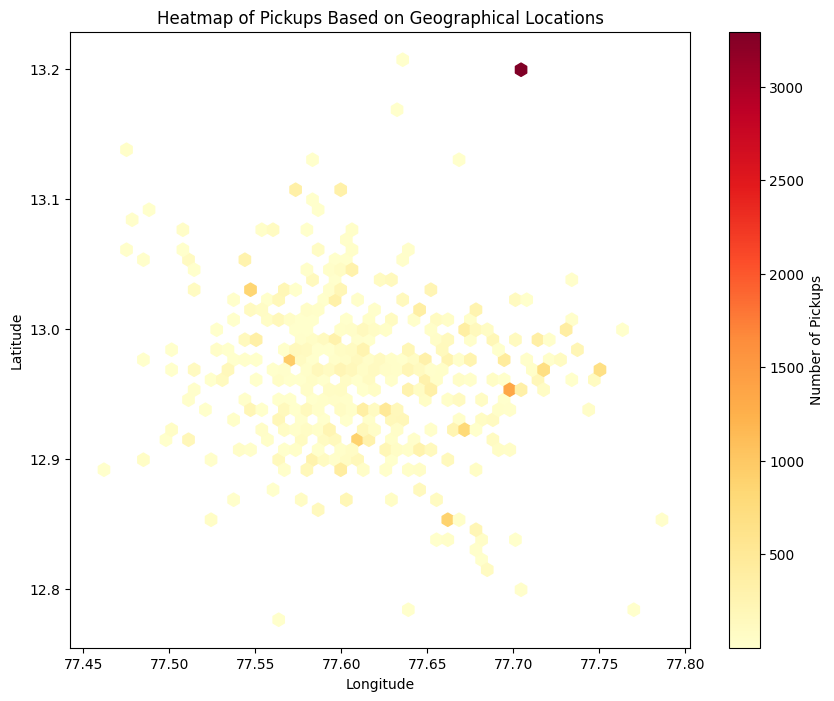

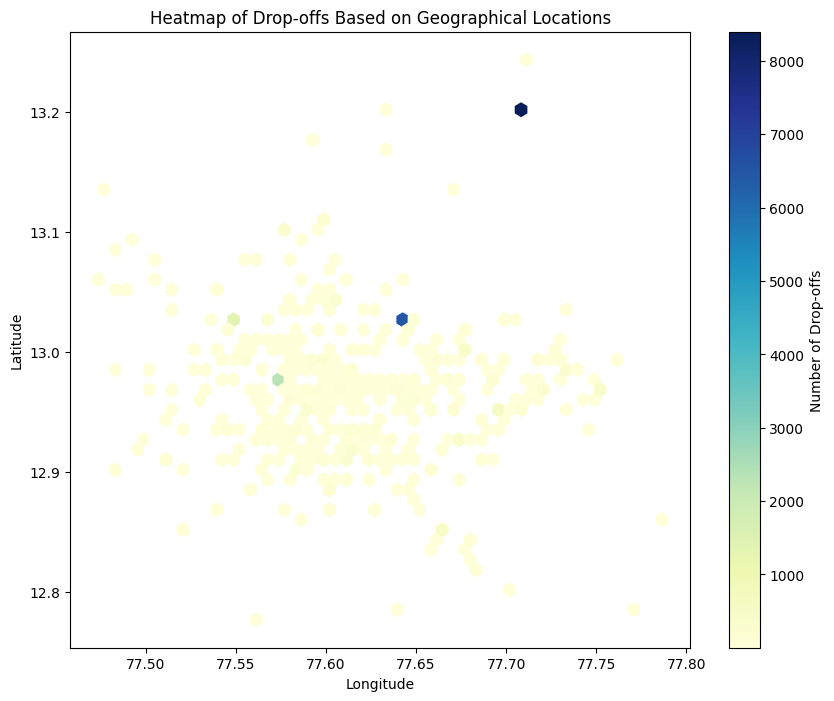

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Select the 'from_lat' and 'from_long' for pickups and drop NaN values
geo_data = data[['from_lat', 'from_long']].dropna()

# Step 2: Create a 2D histogram for density estimation (heatmap)
plt.figure(figsize=(10, 8))

# Using hexbin to plot density of pickups based on latitude and longitude
plt.hexbin(geo_data['from_long'], geo_data['from_lat'], gridsize=50, cmap='YlOrRd', mincnt=1)

# Add colorbar to show the intensity
plt.colorbar(label='Number of Pickups')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Pickups Based on Geographical Locations')

# Show plot
plt.show()

# Optional: Heatmap for drop-off locations
geo_data_dropoff = data[['to_lat', 'to_long']].dropna()

plt.figure(figsize=(10, 8))

# Using hexbin to plot density of drop-offs based on latitude and longitude
plt.hexbin(geo_data_dropoff['to_long'], geo_data_dropoff['to_lat'], gridsize=50, cmap='YlGnBu', mincnt=1)

# Add colorbar to show the intensity
plt.colorbar(label='Number of Drop-offs')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Drop-offs Based on Geographical Locations')

# Show plot
plt.show()


In [17]:
# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Check the column names
print(data.columns)  # Print the column names to identify the correct one for 'booking_timestamp'


Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error'],
      dtype='object')


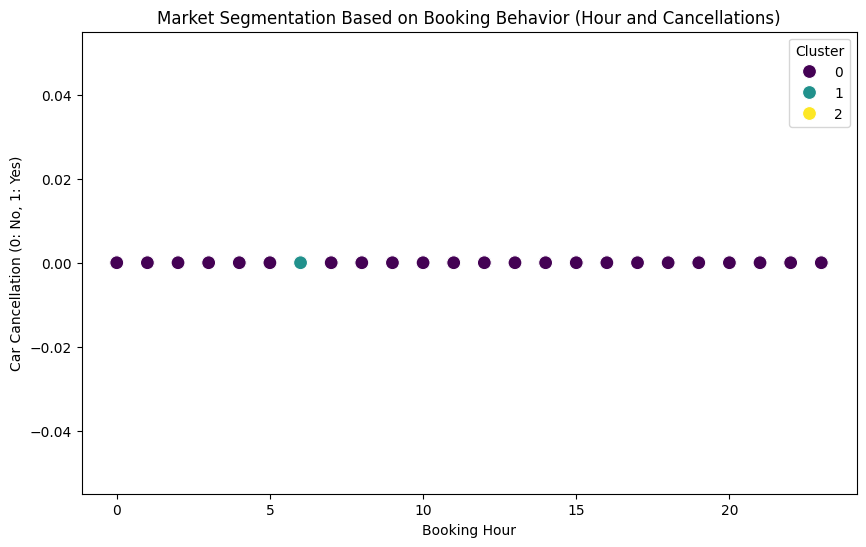

         booking_hour  booking_day_of_week  booking_month  Car_Cancellation
cluster                                                                    
0           13.139544             4.634643       7.824841               0.0
1           15.263263             1.187908       7.780904               0.0
2           14.698838             3.154254       2.718910               0.0


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'YourCabs_cleaned.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocessing
# Use 'booking_created' column instead of 'booking_timestamp'
data['booking_created'] = pd.to_datetime(data['booking_created'], errors='coerce')

# Extract features from the timestamp (e.g., hour, day of the week, month)
data['booking_hour'] = data['booking_created'].dt.hour
data['booking_day_of_week'] = data['booking_created'].dt.dayofweek
data['booking_month'] = data['booking_created'].dt.month

# Selecting relevant columns for clustering
# Assuming 'Car_Cancellation' is your cancellation indicator
cluster_data_behavior = data[['booking_hour', 'booking_day_of_week', 'booking_month', 'Car_Cancellation']].dropna()

# Step 2: Normalize the data
scaler = StandardScaler()
cluster_data_behavior_scaled = scaler.fit_transform(cluster_data_behavior)

# Step 3: K-Means Clustering
kmeans_behavior = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
clusters_behavior = kmeans_behavior.fit_predict(cluster_data_behavior_scaled)

# Adding the cluster labels to the dataset
cluster_data_behavior['cluster'] = clusters_behavior

# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Scatter plot to visualize the clusters based on booking hour and cancellation behavior
sns.scatterplot(x=cluster_data_behavior['booking_hour'],
                y=cluster_data_behavior['Car_Cancellation'],
                hue=cluster_data_behavior['cluster'],
                palette='viridis', s=100)

plt.title('Market Segmentation Based on Booking Behavior (Hour and Cancellations)')
plt.xlabel('Booking Hour')
plt.ylabel('Car Cancellation (0: No, 1: Yes)')
plt.legend(title='Cluster')
plt.show()

# Optional: Analyze cluster statistics
print(cluster_data_behavior.groupby('cluster').mean())
